## Churn Prediction

In [56]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import missingno as msn
import seaborn as sns

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

The main purpose of this project is to build a predictive model of who will churn or who won't churn but before we build that model we must find why people churn in the first place or similarities between people who churn

### 2.Data Wrangling

#### 2.1. Importing the data

In [3]:
# Importing the telecom dataset
data=pd.read_csv('telecom.csv')
data.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [4]:
# Importing US states dataset
us_states=pd.read_csv('state-abbrevs.csv')
us_states.head(3)

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ


#### 2.2. Data Exploration

In [5]:
# Data Columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# Data Shape
data.shape

(3333, 21)

In [7]:
# Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

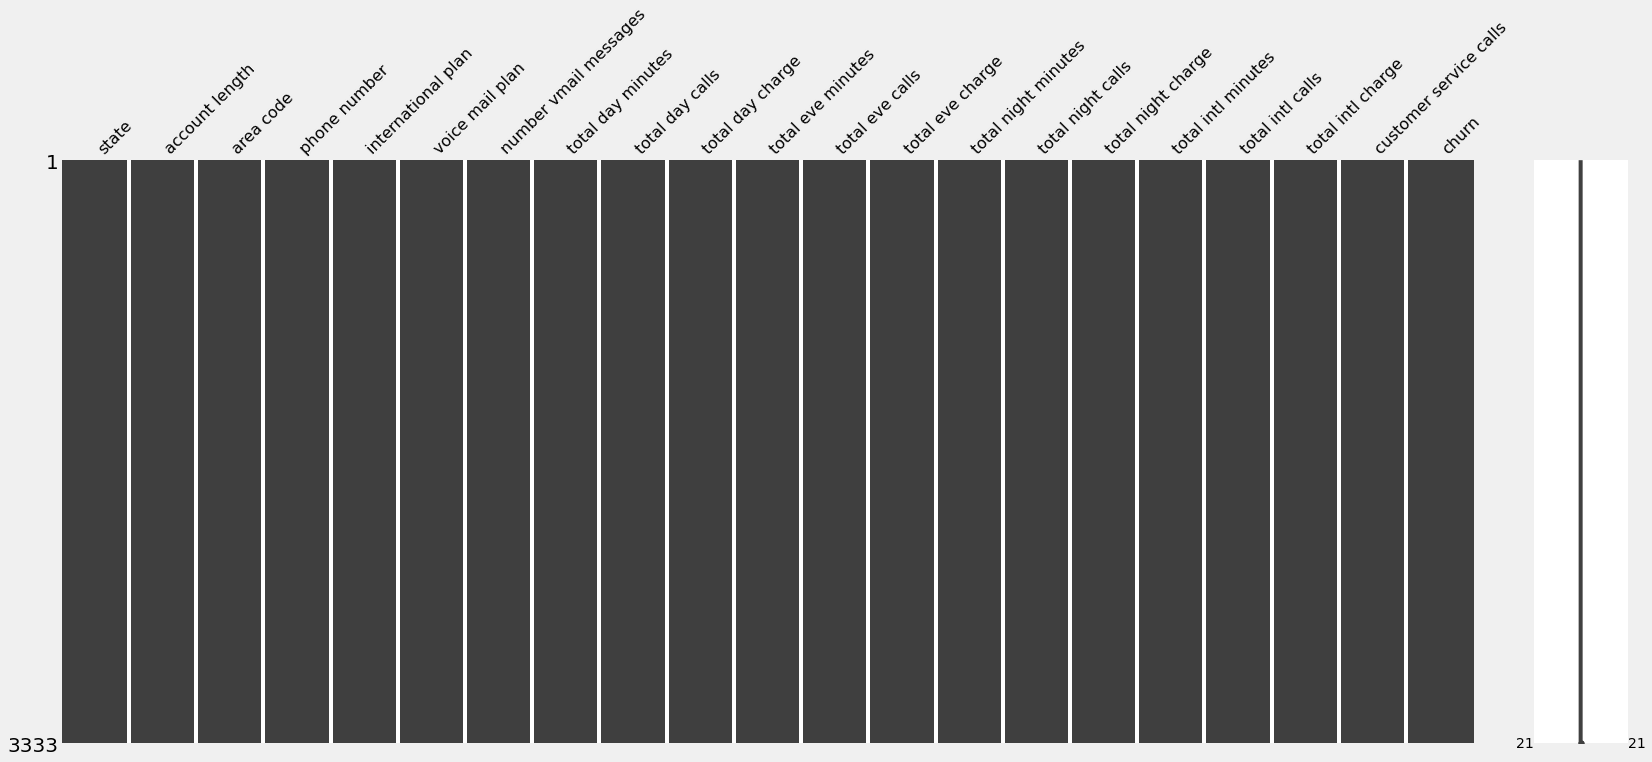

In [8]:
# Checking Null Values (1)
msn.matrix(data);
## No Null values

In [9]:
## Checking Null Values (2)
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### 3. Explaratory Data Analysis


#### 3.1 States and Churn

In [10]:
# Making a list of us states names to be used later
us_states=us_states.sort_values('abbreviation')
list_state=list(us_states['state'])

In [11]:
# Making a new dataset to analyze churn percentage in each state
states_churn=pd.crosstab(data['state'],data['churn'])
states_churn['Total People']=states_churn[False]+states_churn[True]
states_churn['churn_percentage']=round((states_churn[True]*100)/states_churn['Total People'],2)
states_churn=states_churn.sort_values('state')
states_churn['state_names']=list_state
states_churn=states_churn[['state_names',False,True,'Total People','churn_percentage']]
states_churn.head(5)

churn,state_names,False,True,Total People,churn_percentage
state,,,,,
AK,Alaska,49,3,52,5.77
AL,Alabama,72,8,80,10.00
AR,Arkansas,44,11,55,20.00
AZ,Arizona,60,4,64,6.25
CA,California,25,9,34,26.47


In [12]:
# Top 10 states with a high percentage of churning
first_top10=states_churn.sort_values('churn_percentage', ascending=False).head(10)
first_top10

churn,state_names,False,True,Total People,churn_percentage
state,,,,,
NJ,New Jersey,50,18,68,26.47
CA,California,25,9,34,26.47
TX,Texas,54,18,72,25.00
MD,Maryland,53,17,70,24.29
SC,South Carolina,46,14,60,23.33
MI,Michigan,57,16,73,21.92
MS,Mississippi,51,14,65,21.54
NV,Nevada,52,14,66,21.21
WA,Washington,52,14,66,21.21


In [13]:
# Top 10 states with a low percentage of churning
last_top10=states_churn.sort_values('churn_percentage', ascending=True).head(10)
last_top10

churn,state_names,False,True,Total People,churn_percentage
state,,,,,
HI,Hawaii,50,3,53,5.66
AK,Alaska,49,3,52,5.77
AZ,Arizona,60,4,64,6.25
VA,Virginia,72,5,77,6.49
IA,Iowa,41,3,44,6.82
LA,Louisiana,47,4,51,7.84
NE,Nebraska,56,5,61,8.20
IL,Illinois,53,5,58,8.62
WI,Wisconsin,71,7,78,8.97


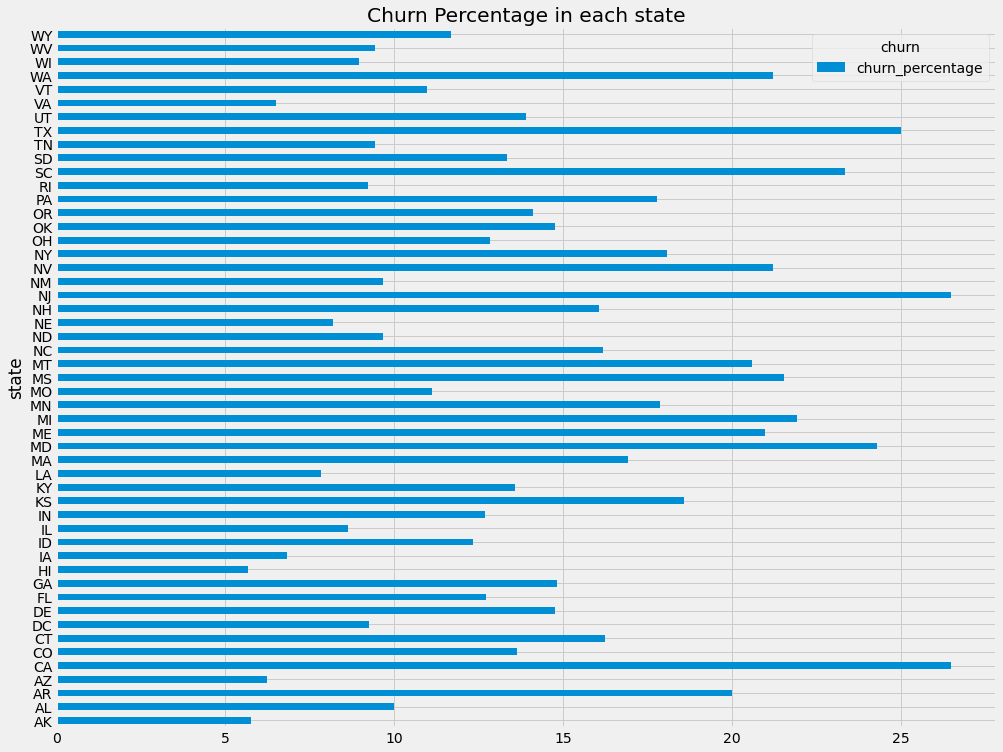

In [14]:
# Churn rate in each state
states_churn[['state_names','churn_percentage']].plot(kind='barh', figsize=(15,12), title='Churn Percentage in each state');

In [15]:
# Total people that uses the line for states with a high percentage of churns and those with low percentage of churn
(sum(first_top10['Total People']),sum(last_top10['Total People']))

(636, 603)

In [16]:
# Average of churn percentage for states with high probality of churn and those with low probability of churn
(round(first_top10['churn_percentage'].mean(),2),round(last_top10['churn_percentage'].mean(),2))

(23.24, 7.39)

**Conclusion_1**: 
- By looking at the graph and tables we see that the total number of people that uses the line does not have a big impact on churn for example **Mississippi** and **Rhode Island** has the same number of people who uses this telecom company but these two states are completely on different sides when it comes to churn percentage.

- By focusing on those states with low churn the company will be reducing the churn rate up to 15% since by having a lot number people that uses the line is not really a big factor that drives the churn rate


#### 3.2. Churn

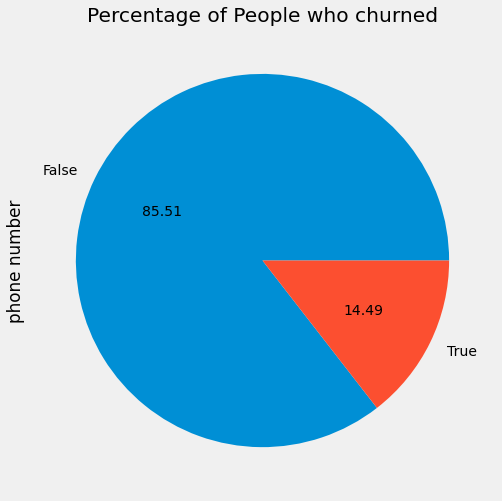

In [17]:
# Percentage of people who churn
data.groupby('churn')['phone number'].count().plot(kind='pie', autopct='%.2f',figsize=(8,8));
plt.title('Percentage of People who churned');
## Almost 15% of all phone numbers churn

In [18]:
# Churn and minutes
churn_minutes=data.groupby('churn')[['total day minutes','total eve minutes','total night minutes']].mean()
churn_minutes['Total']=churn_minutes['total day minutes']+churn_minutes['total eve minutes']+churn_minutes['total night minutes']
churn_minutes
## we can see that peole who churn spend more minutes on calls on average more than those who did not churn

,total day minutes,total eve minutes,total night minutes,Total
churn,,,,
False,175.175754,199.043298,200.133193,574.352246
True,206.914079,212.410145,205.231677,624.555901


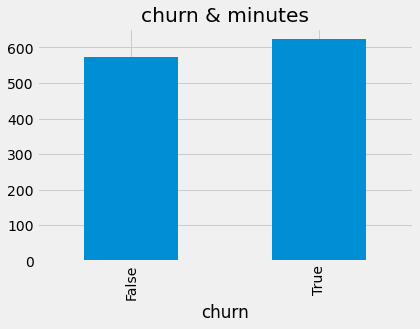

In [19]:
churn_minutes['Total'].plot(kind='bar', title='churn & minutes');

In [20]:
# Churn and number of calls
churn_calls=data.groupby('churn')[['total day calls','total eve calls','total night calls']].mean()
churn_calls['Total']=churn_calls['total day calls']+churn_calls['total eve calls']+churn_calls['total night calls']
churn_calls
## The number of calls on average are almost the same but still the average number of calls a person who churns is 
## still  higher than the person who did not churn

,total day calls,total eve calls,total night calls,Total
churn,,,,
False,100.283158,100.038596,100.058246,300.380000
True,101.335404,100.561077,100.399586,302.296066


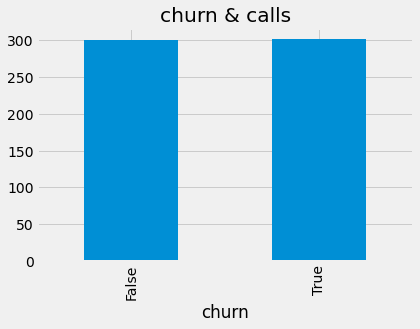

In [21]:
churn_calls['Total'].plot(kind='bar', title='churn & calls');

In [22]:
# churn and charges
churn_charges=data.groupby('churn')[['total day charge','total eve charge','total night charge']].mean()
churn_charges['Total']=churn_charges['total day charge']+churn_charges['total eve charge']+churn_charges['total night charge']
churn_charges
## People who churn are charged more on average more than people who do not especially during the day

,total day charge,total eve charge,total night charge,Total
churn,,,,
False,29.780421,16.918909,9.006074,55.705404
True,35.175921,18.054969,9.235528,62.466418


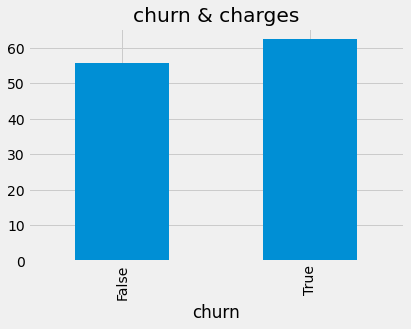

In [23]:
churn_charges['Total'].plot(kind='bar', title='churn & charges');

In [24]:
# Churn and International Services
churn_international=data.groupby('churn')[['total intl minutes','total intl calls','total intl charge']].mean()
churn_international
## People who churn get almost the same international services as people who do not.But people who do not churn still have
## a higher number

,total intl minutes,total intl calls,total intl charge
churn,,,
False,10.158877,4.532982,2.743404
True,10.700000,4.163561,2.889545


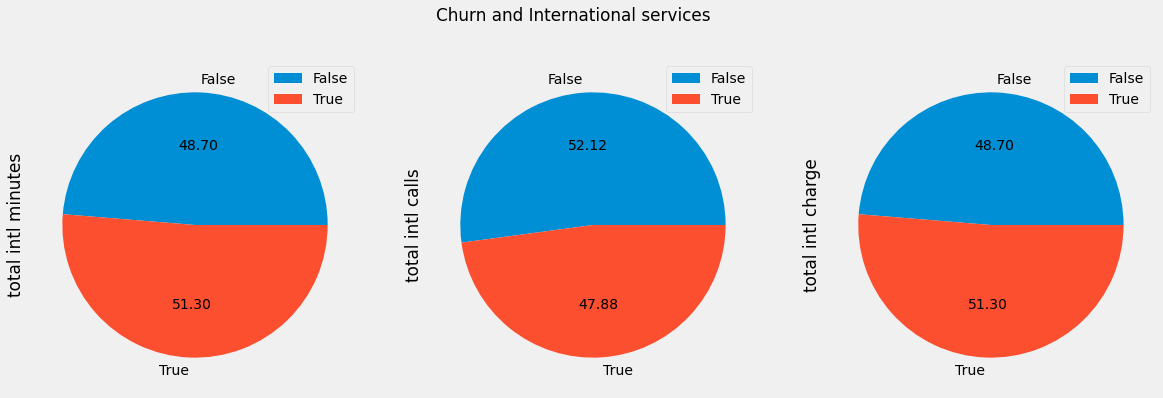

In [25]:
churn_international.plot(kind='pie',subplots=True, figsize=(18,6),autopct='%.2f', title='Churn and International services');

In [26]:
# Churn and number of Voicemails
churn_voicemails=data.groupby('churn')['number vmail messages'].mean()
churn_voicemails
## People who do not churn receive more voice messages than those who churn

churn
False    8.604561
True     5.115942
Name: number vmail messages, dtype: float64

**Conclusion_2**:
- Looking at the tables above we see that the numbers are almost the same but the numbers of people who churn are a little bit higher than those of who do not churn. People who churn spent more minutes on average more than those who did not churn,they had more number of calls and even more international minutes.
- The only time where people who do not churn has a bigger number is the total number of international calls by 52% of all calls and the number of voice mail messages.
- There could be many reasons but lets first see the average account length of these two categories (the people who churn and those who did not churn)

In [27]:
churn_account_length=round(data.groupby('churn')['account length'].mean(),1)
churn_account_length

churn
False    100.8
True     102.7
Name: account length, dtype: float64

**Conclusion_3**:
- It is possible that because people who churn have longer account length (integer value, how long the account have been active) had an impact on them having a hihger number of  total  minutes, calls, charges and international services than people did not churn

In [28]:
# churn & international plan
pd.crosstab(data['churn'], data['international plan'])

international plan,no,yes
churn,,
False,2664,186
True,346,137


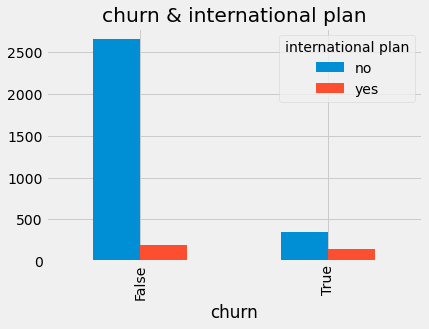

In [29]:
pd.crosstab(data['churn'], data['international plan']).plot(kind='bar', title= 'churn & international plan');

In [30]:
# churn and voice mail plan
pd.crosstab(data['voice mail plan'], data['churn'])

churn,False,True
voice mail plan,,
no,2008,403
yes,842,80


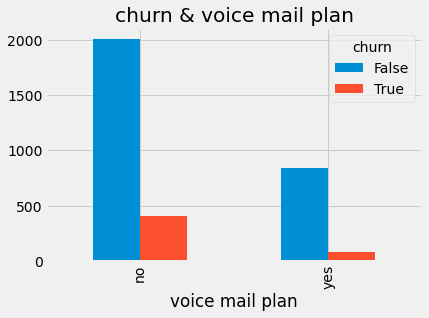

In [31]:
pd.crosstab(data['voice mail plan'], data['churn']).plot(kind='bar', title= 'churn & voice mail plan');

In [32]:
# churn & area code
pd.crosstab(data['area code'], data['churn'])

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


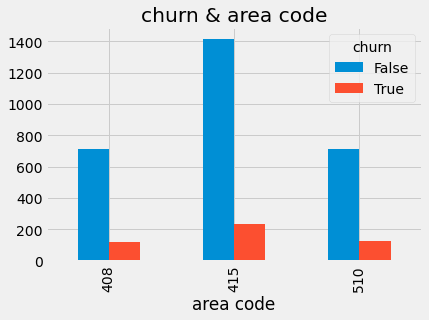

In [33]:
pd.crosstab(data['area code'], data['churn']).plot(kind='bar', title='churn & area code');

In [34]:
# churn and the number of customer services calls
churn_customer_service_calls=round(data.groupby('churn')['customer service calls'].mean(),2)
churn_customer_service_calls

churn
False    1.45
True     2.23
Name: customer service calls, dtype: float64

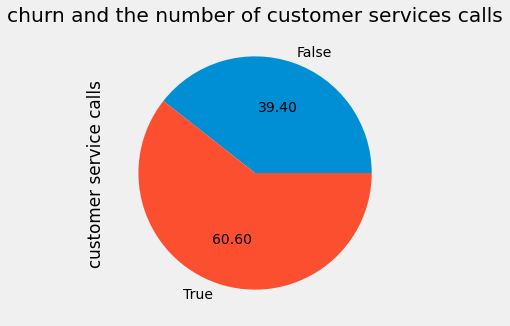

In [35]:
churn_customer_service_calls.plot(kind='pie', autopct='%.2f',figsize=(5,5), title='churn and the number of customer services calls');

### 4. Feature Engineering

In [36]:
df=data.copy()

In [37]:
# Replacing state abbreviations with integers
num1_num51=np.arange(1,52)
list_state2=list(np.sort(df['state'].unique()))
df['state'].replace(list_state2,num1_num51, inplace=True)

In [38]:
# Replacing area codes with integers
list_area_code=list(df['area code'].unique())
df['area code'].replace(list_area_code,[1,2,3], inplace=True)

In [39]:
#Replacing international plan with integers
df['international plan'].replace(['no','yes'],[0,1], inplace=True)

In [40]:
#Replacing voice mail plan with integers
df['voice mail plan'].replace(['yes','no'],[1,0], inplace=True)

In [41]:
# Replacing churn with integers
df['churn'].replace([False,True],[0,1], inplace=True)

In [42]:
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,17,128,1,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,36,107,1,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,32,137,1,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,36,84,2,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,37,75,1,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 5. Pre_Processing and Processing

In [43]:
# 5.1 Defining the Target
X=df[['state','account length','area code','international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
y=df['churn']

In [44]:
# 5.2 Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=2)

In [45]:
#Training the algorithm
tpot= TPOTClassifier(generations=1,verbosity=2,random_state=42)
tpot.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.9527783567134268

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=100)


TPOTClassifier(generations=1, random_state=42, verbosity=2)

In [57]:
#Fitting and training the model
model=ExtraTreesClassifier(n_estimators=250,random_state=0)
model.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=250, random_state=0)

In [59]:
# The score on the Test dataset
model.score(X_test,y_test)

0.9364508393285371

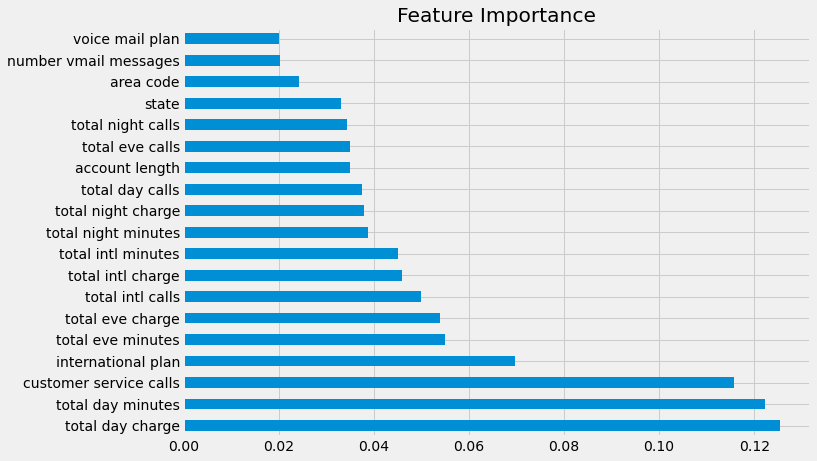

In [74]:
# Feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(100).plot(kind='barh', title='Feature Importance', figsize=(10,7));